In [1]:
!pip install gensim

In [2]:
import nltk
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [3]:
import gensim.downloader as api

glove_model = api.load("glove-wiki-gigaword-50")

[==================================================] 100.0% 66.0/66.0MB downloaded


In [4]:
!kaggle datasets download -d ahmedabdulhamid/reviews-dataset

Dataset URL: https://www.kaggle.com/datasets/ahmedabdulhamid/reviews-dataset
License(s): unknown
  0%|                                               | 0.00/3.90M [00:00<?, ?B/s]
100%|███████████████████████████████████████| 3.90M/3.90M [00:00<00:00, 225MB/s]


In [5]:
!unzip 'reviews-dataset.zip'

Archive:  reviews-dataset.zip
  inflating: TestReviews.csv         
  inflating: TrainingDataNegative.txt  
  inflating: TrainingDataPositive.txt  


In [6]:
with open('TrainingDataNegative.txt','r',encoding = 'utf-8') as file:
    Negetive = file.readlines()
with open('TrainingDataPositive.txt','r',encoding = 'utf-8') as file:
    Positive = file.readlines()

In [7]:
Negetive_df = pd.DataFrame({'review':[review.strip() for review in Negetive]})
Positive_df = pd.DataFrame({'review':[review.strip() for review in Positive]})

In [8]:
test_data = pd.read_csv('TestReviews.csv')

In [9]:
test_data.head()

,review,class
0,Fantastic spot for an even or a quite cocktail...,1
1,"Love, love, love the calamari. It's so good an...",1
2,"Love this place. Stiff martinis and cocktails,...",1
3,It's everything a great cocktail bar should be...,1
4,"I came here before a pirates game, so it was a...",1


In [10]:
Negetive_df['sentiment'] = "negetive"
Positive_df['sentiment'] = "positive"

In [11]:
train_data = pd.concat([Negetive_df,Positive_df],ignore_index = True)

In [12]:
train_data['Tokens'] = train_data['review'].apply(word_tokenize)
test_data['Tokens'] = test_data['review'].apply(word_tokenize)

In [13]:
test_data['sentiment'] = test_data['class'].apply(lambda x: 'positive' if x == 1 else 'negative')

In [14]:
train_data.head()

,review,sentiment,Tokens
0,"Perhaps good product, but really poor service....",negetive,"[Perhaps, good, product, ,, but, really, poor,..."
1,Been going here for specialty boat items for 1...,negetive,"[Been, going, here, for, specialty, boat, item..."
2,This place was a joke we rented 1 jet ski and ...,negetive,"[This, place, was, a, joke, we, rented, 1, jet..."
3,We were out at the lake this weekend boating a...,negetive,"[We, were, out, at, the, lake, this, weekend, ..."
4,JET ACTION RENTALS destroyed my view on small ...,negetive,"[JET, ACTION, RENTALS, destroyed, my, view, on..."


In [15]:
test_data.head()

,review,class,Tokens,sentiment
0,Fantastic spot for an even or a quite cocktail...,1,"[Fantastic, spot, for, an, even, or, a, quite,...",positive
1,"Love, love, love the calamari. It's so good an...",1,"[Love, ,, love, ,, love, the, calamari, ., It,...",positive
2,"Love this place. Stiff martinis and cocktails,...",1,"[Love, this, place, ., Stiff, martinis, and, c...",positive
3,It's everything a great cocktail bar should be...,1,"[It, 's, everything, a, great, cocktail, bar, ...",positive
4,"I came here before a pirates game, so it was a...",1,"[I, came, here, before, a, pirates, game, ,, s...",positive


In [16]:
def get_avg_embedding(tokens):
    embeddings = [glove_model[word] for word in tokens if word in glove_model]
    return np.mean(embeddings, axis=0) if embeddings else np.zeros(glove_model.vector_size)


In [17]:
train_data['embeddings'] = train_data['Tokens'].apply(get_avg_embedding)
test_data['embeddings'] = test_data['Tokens'].apply(get_avg_embedding)

In [18]:
test_data.head()

,review,class,Tokens,sentiment,embeddings
0,Fantastic spot for an even or a quite cocktail...,1,"[Fantastic, spot, for, an, even, or, a, quite,...",positive,"[0.26556075, 0.1369994, -0.17053388, -0.034029..."
1,"Love, love, love the calamari. It's so good an...",1,"[Love, ,, love, ,, love, the, calamari, ., It,...",positive,"[0.22409707, 0.2975156, -0.29148984, 0.0693331..."
2,"Love this place. Stiff martinis and cocktails,...",1,"[Love, this, place, ., Stiff, martinis, and, c...",positive,"[0.14470643, 0.220986, -0.18872727, -0.1710596..."
3,It's everything a great cocktail bar should be...,1,"[It, 's, everything, a, great, cocktail, bar, ...",positive,"[0.22715268, 0.28385925, -0.21918082, 0.022998..."
4,"I came here before a pirates game, so it was a...",1,"[I, came, here, before, a, pirates, game, ,, s...",positive,"[0.22998813, 0.09950722, -0.21259621, -0.05042..."


In [19]:
train_data.head()

,review,sentiment,Tokens,embeddings
0,"Perhaps good product, but really poor service....",negetive,"[Perhaps, good, product, ,, but, really, poor,...","[0.2926184, 0.1265644, 0.038128715, -0.1099310..."
1,Been going here for specialty boat items for 1...,negetive,"[Been, going, here, for, specialty, boat, item...","[0.19120462, 0.19396187, -0.041443802, -0.1012..."
2,This place was a joke we rented 1 jet ski and ...,negetive,"[This, place, was, a, joke, we, rented, 1, jet...","[0.26337358, 0.07481212, 0.045919683, -0.14281..."
3,We were out at the lake this weekend boating a...,negetive,"[We, were, out, at, the, lake, this, weekend, ...","[0.3768471, 0.14824079, -0.08772879, -0.123735..."
4,JET ACTION RENTALS destroyed my view on small ...,negetive,"[JET, ACTION, RENTALS, destroyed, my, view, on...","[0.3074227, 0.13519254, 0.047113672, -0.129043..."


In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, auc
import matplotlib.pyplot as plt

In [21]:
X_train = np.vstack(train_data['embeddings'].values)
y_train = train_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

X_test = np.vstack(test_data['embeddings'].values)
y_test = test_data['sentiment'].apply(lambda x: 1 if x == 'positive' else 0).values

In [22]:
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

# Train Random Forest model
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

RandomForestClassifier()

In [23]:
y_pred_lr = lr_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)

In [24]:
# Metrics for Logistic Regression
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_lr))
print('Precision:', precision_score(y_test, y_pred_lr))
print('Recall:', recall_score(y_test, y_pred_lr))

# Metrics for Random Forest
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))

Logistic Regression:
Accuracy: 0.8581346910437399
Precision: 0.8769035532994924
Recall: 0.9247239879558381
Random Forest:
Accuracy: 0.865077528349919
Precision: 0.8654313487241798
Recall: 0.9531615925058547


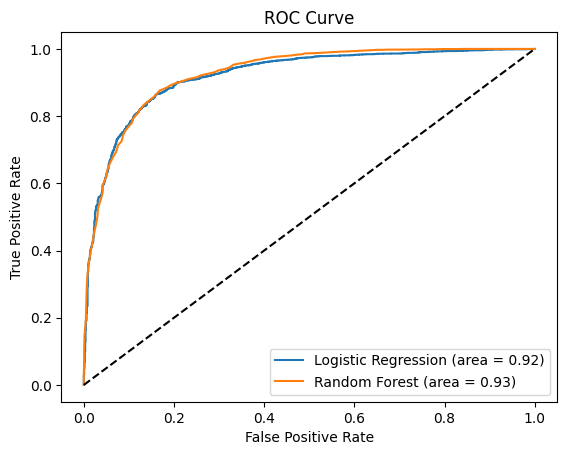

In [25]:
# ROC Curve
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])

plt.figure()
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression (area = %0.2f)' % auc(fpr_lr, tpr_lr))
plt.plot(fpr_rf, tpr_rf, label='Random Forest (area = %0.2f)' % auc(fpr_rf, tpr_rf))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()